Il existe de nombreuses stratégies que vous pourriez envisager pour déterminer des conformations plus représentatives de vos clusters. Voici quelques suggestions :

- Analyse en Composantes Principales (ACP): L'ACP est une méthode de réduction de dimensionnalité qui peut être utile pour visualiser des données multidimensionnelles. Elle peut vous aider à comprendre les principales directions de variabilité dans vos données et à identifier des conformations qui sont représentatives de ces directions.

- Médoides de Clustering: Au lieu d'utiliser le centroïde d'un cluster (qui est la moyenne de tous les points dans le cluster), vous pourriez envisager d'utiliser le médoide, qui est le point du cluster le plus proche de tous les autres points. Cela peut être plus représentatif, surtout si vos données sont bruitées ou contiennent des valeurs aberrantes.

- Density-Based Spatial Clustering of Applications with Noise (DBSCAN) : DBSCAN est une méthode de clustering qui peut capturer des clusters de formes plus complexes que KMeans. Elle pourrait aider à identifier des conformations qui sont plus représentatives de la structure sous-jacente de vos données.

- Analyse de silhouette: L'analyse de silhouette peut être utilisée pour évaluer la qualité du clustering. Elle mesure à quel point chaque point est proche des points de son propre cluster par rapport aux points des autres clusters. Vous pouvez utiliser cette information pour identifier les points qui sont les plus représentatifs de leurs clusters.

- Sampling basé sur l'énergie: Dans certaines simulations de protéines, les conformations avec des énergies plus basses sont souvent plus représentatives de l'état naturel de la protéine. Vous pourriez envisager d'utiliser un échantillonnage basé sur l'énergie pour identifier ces conformations.

- Méthodes de clustering hiérarchique: Ces méthodes construisent un arbre de clusters, ce qui peut vous aider à comprendre comment les clusters se rapportent les uns aux autres à différents niveaux de granularité.

Rappelez-vous, le choix de la meilleure stratégie dépend de vos données spécifiques et de vos objectifs de recherche. Il est souvent utile d'expérimenter plusieurs approches et de comparer leurs résultats.

## Médoides de Clustering: 

Le clustering de médoides est une technique de clustering similaire au K-means, mais elle utilise une approche différente pour déterminer le centre d'un cluster.

Dans le clustering K-means, le centre (ou "centroïde") d'un cluster est défini comme la moyenne de tous les points dans le cluster. En d'autres termes, pour chaque dimension de l'espace des caractéristiques, on calcule la moyenne des valeurs de cette dimension pour tous les points du cluster, et ces moyennes définissent le point central.

Dans le clustering de médoides, en revanche, le centre d'un cluster est un point réel de l'ensemble des données. Le médoid est le point du cluster dont la somme des distances à tous les autres points du cluster est la plus petite. En d'autres termes, c'est le point le plus "proche" de tous les autres points du cluster, si on mesure la proximité par la distance euclidienne (ou une autre mesure de distance que vous choisissez).

L'avantage de l'utilisation des médoides est qu'ils sont plus robustes aux valeurs aberrantes et au bruit. Parce que les médoides sont des points réels de l'ensemble des données, ils ne sont pas autant affectés par les valeurs aberrantes que les moyennes. C'est pourquoi le clustering de médoides est souvent utilisé lorsque les données contiennent beaucoup de bruit ou de valeurs aberrantes, ou lorsque la "moyenne" d'un groupe de points n'a pas de sens ou n'est pas représentative.

Pour donner un exemple simple, imaginez que vous avez un cluster de points le long d'une ligne droite. Si un seul point est très loin des autres, la moyenne de tous les points (le centroïde) sera tirée vers ce point éloigné. Mais le médoid restera près de la ligne de points, car c'est là que se trouvent la plupart des points. Ainsi, le médoid peut être un meilleur représentant du cluster dans ce cas.

In [2]:
import pandas as pd

# Load the data

data = pd.read_csv('C:\\Users\\sujit\\Downloads\\These\\Data\\Data\\Analyse\\PCA\\data\\data_bis.csv')

# Display the first few rows of the dataframe
data.head()


,Unnamed: 0,eigenvector_1,eigenvector_2,md,size,marker,color,models
0,0,0.56984,0.34503,start-1,start,start,1,Rose
1,1,-0.95218,0.12071,1,frame,frame,1,Rose
2,2,-1.10430,0.12301,1,frame,frame,1,Rose
3,3,-3.22009,-1.05007,1,frame,frame,1,Rose
4,4,-3.18054,-0.59651,1,frame,frame,1,Rose


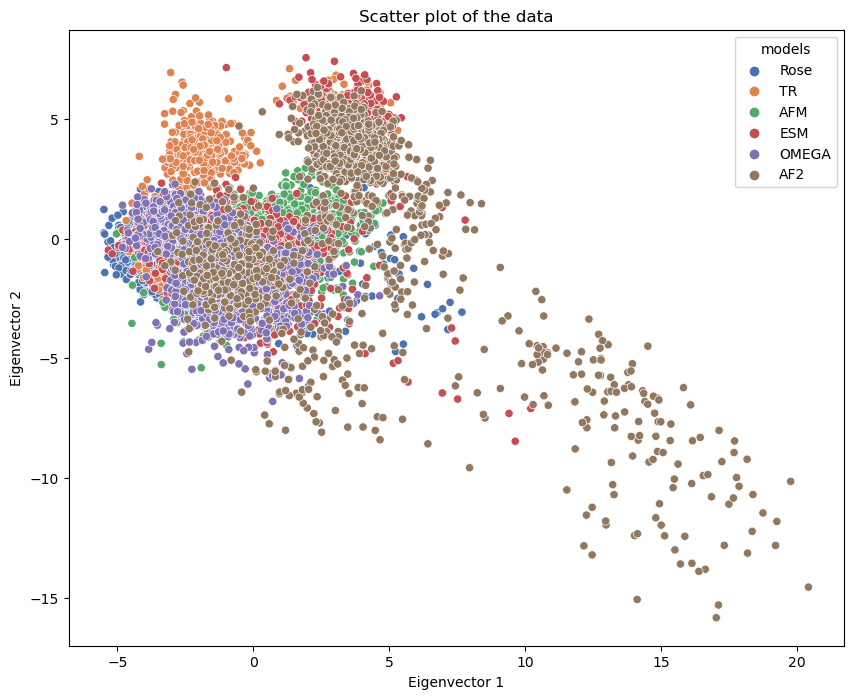

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='eigenvector_1', y='eigenvector_2', hue='models', data=data, palette="deep")

plt.title('Scatter plot of the data')
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')

plt.show()


C:\Users\sujit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sujit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sujit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sujit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sujit\anaconda3\Lib\site-packages\sklearn\clust

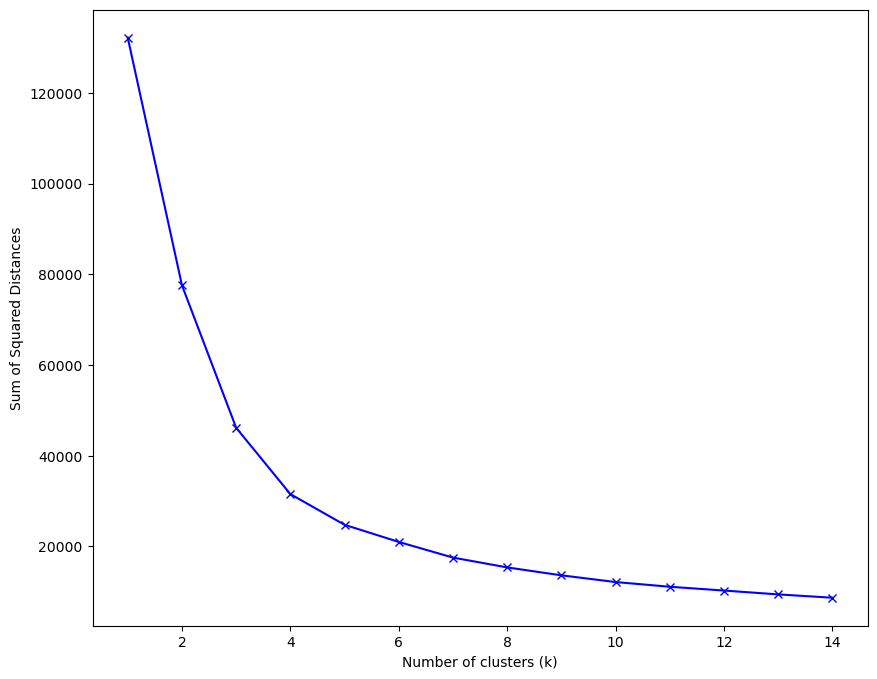

In [5]:
from sklearn.cluster import KMeans

# Prepare the feature matrix
X = data[['eigenvector_1', 'eigenvector_2']]

# List to hold the sum of squared distances
ssd = []

# We will check for 1 to 15 clusters
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    ssd.append(km.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 8))
plt.plot(K, ssd, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()


In [6]:
from sklearn_extra.cluster import KMedoids
X = data[['eigenvector_1', 'eigenvector_2']]

# Assuming `X` is your data
kmedoids = KMedoids(n_clusters=5, random_state=0).fit(X)

# The medoid indices can be accessed as follows
medoid_indices = kmedoids.medoid_indices_

# The medoid (most representative) points can be accessed as follows
medoids = X.iloc[medoid_indices]


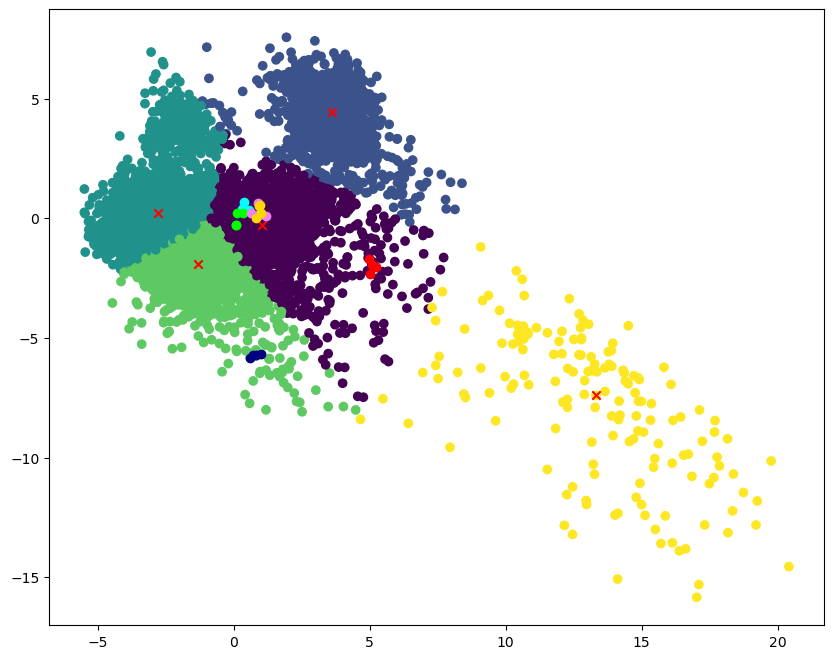

In [15]:
# Create a subset of the data that represents the starting points
start_points = data[data['size'].str.contains('start')]
# Get the cluster labels
labels = kmedoids.labels_
# Plot the clustering results
plt.figure(figsize=(10, 8))
plt.scatter(X['eigenvector_1'], X['eigenvector_2'], c=labels, cmap='viridis')

# Mark the medoids
plt.scatter(medoids['eigenvector_1'], medoids['eigenvector_2'], c='red', marker='x')

# Define the colors and categories
colors = ["aqua", "lime", "violet", "gold", "navy", "red"]
categories = start_points['models'].unique()

# Mark the starting points with different colors
for category, color in zip(categories, colors):
    plt.scatter(start_points[start_points['models'] == category]['eigenvector_1'], 
                start_points[start_points['models'] == category]['eigenvector_2'], 
                c=color, 
                label=category)

plt.savefig('Kmean_k5.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()


In [8]:
medoid_frames = data.iloc[medoid_indices]
medoid_frames

,Unnamed: 0,eigenvector_1,eigenvector_2,md,size,marker,color,models
4518,4518,1.03214,-0.30211,16,frame,frame,16,ESM
1846,1846,3.59678,4.43789,7,frame,frame,7,TR
2272,2272,-2.76846,0.21651,8,frame,frame,8,TR
6450,6450,-1.30922,-1.92326,22,frame,frame,22,AF2
6726,6726,13.31729,-7.40725,23,frame,frame,23,AF2


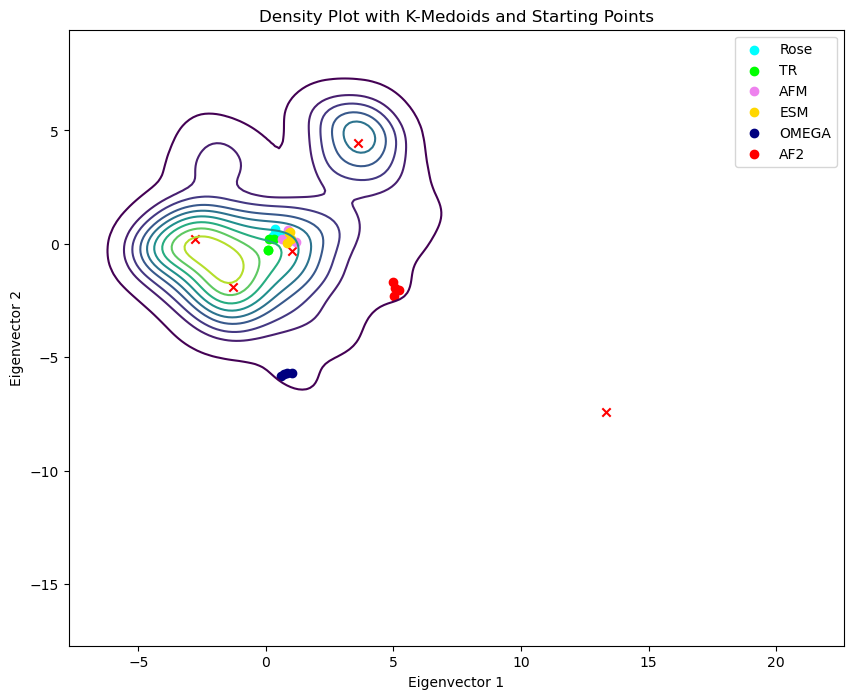

In [44]:
import seaborn as sns

# Create a new figure
plt.figure(figsize=(10, 8))


# Create the density plot
sns.kdeplot(data=X, x='eigenvector_1', y='eigenvector_2',fill=False, cmap='viridis', levels=10)

# Mark the medoids
plt.scatter(medoids['eigenvector_1'], medoids['eigenvector_2'], c='red', marker='x')

# Define the colors and categories
colors = ["aqua", "lime", "violet", "gold", "navy", "red"]
categories = start_points['models'].unique()

# Mark the starting points with different colors
for category, color in zip(categories, colors):
    plt.scatter(start_points[start_points['models'] == category]['eigenvector_1'], 
                start_points[start_points['models'] == category]['eigenvector_2'], 
                c=color, 
                label=category)

plt.title('Density Plot with K-Medoids and Starting Points')
plt.xlabel('Eigenvector 1')
plt.ylabel('Eigenvector 2')
plt.legend()
plt.show()
